# 훈련 세트와 테스트 세트

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/2-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 훈련 세트와 테스트 세트

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [23]:
FixedWing_df = pd.read_csv("FixedWing.csv")

In [24]:
FixedWing_df.columns

Index(['Company', 'Name', 'Length', 'Width', 'Weight'], dtype='object')

In [25]:
FixedWingLength = np.array(FixedWing_df['Length'])
FixedWingWeight = np.array(FixedWing_df['Weight'])

In [26]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    FixedWingLength, FixedWingWeight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [27]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [28]:
print(knr.predict([[2700]]))

[13426.66666667]


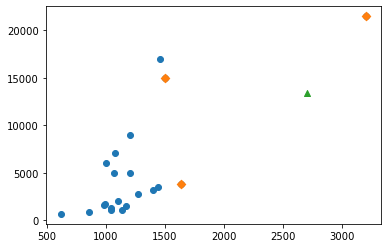

In [29]:
# 2500cm 고정익 이웃을 구합니다
distances, indexes = knr.kneighbors([[2700]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 2700cm 고정익 데이터
plt.scatter(2700, 13426, marker='^')
plt.show()

In [30]:
print(np.mean(train_target[indexes]))

13426.666666666666


In [31]:
print(knr.predict([[2700]]))

[13426.66666667]


# 선형회귀

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [34]:
# 2700cm 회전익에 대한 예측
print(lr.predict([[2700]]))

[17852.2157879]


In [35]:
print(lr.coef_, lr.intercept_)

[8.72444101] -5703.774947278429


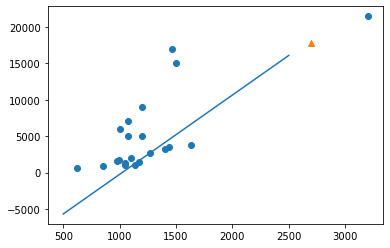

In [36]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 500에서 2500까지 1차 방정식 그래프를 그립니다
plt.plot([500, 2500], [1*lr.coef_+lr.intercept_, 2500*lr.coef_+lr.intercept_])
# 2500cm 고정익 데이터
plt.scatter(2700, 17852, marker='^')
plt.show()

#다항회귀

In [37]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [38]:
print(train_poly.shape, test_poly.shape)

(21, 2) (7, 2)


In [39]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[2700**2, 2700]]))

[17964.37069253]


In [40]:
print(lr.coef_, lr.intercept_)

[-7.27700306e-04  1.15597108e+01] -7941.913123050774


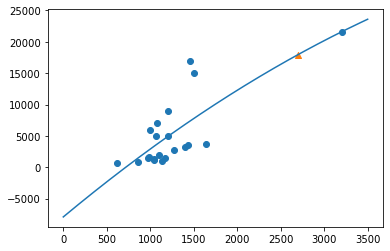

In [45]:
# 구간별 직선을 그리기 위해 1에서 35001까지 정수 배열을 만듭니다
point = np.arange(1, 3501)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 1에서 3500까지 2차 방정식 그래프를 그립니다
plt.plot(point, -0.0007277*point**2 + 11.5597*point - 7941.913)
# 2700cm 회전익 데이터
plt.scatter([2700], [17964], marker='^')
plt.show()